In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from plotly import tools
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Loading the data

In [35]:
df = pd.read_csv("C:/Users/Anirudh MV/Downloads/Dataset.csv",parse_dates=["observation_date"])
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [36]:
df.info

<bound method DataFrame.info of       observation_date  DEXINUS
0           1973-01-02     8.02
1           1973-01-03     8.02
2           1973-01-04     8.00
3           1973-01-05     8.01
4           1973-01-08     8.00
...                ...      ...
12644       2021-06-21    74.18
12645       2021-06-22    74.37
12646       2021-06-23    74.13
12647       2021-06-24    74.14
12648       2021-06-25    74.14

[12649 rows x 2 columns]>

In [37]:
df.shape

(12649, 2)

#### Renaming

In [38]:
data = df[['observation_date','DEXINUS']]
data.columns = ['date','rate']
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [39]:
df.describe

<bound method NDFrame.describe of       observation_date  DEXINUS
0           1973-01-02     8.02
1           1973-01-03     8.02
2           1973-01-04     8.00
3           1973-01-05     8.01
4           1973-01-08     8.00
...                ...      ...
12644       2021-06-21    74.18
12645       2021-06-22    74.37
12646       2021-06-23    74.13
12647       2021-06-24    74.14
12648       2021-06-25    74.14

[12649 rows x 2 columns]>

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [41]:
df.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

### Fill null values

In [42]:
data.fillna(method='ffill', inplace=True)

In [43]:
data.isnull().sum()

date    0
rate    0
dtype: int64

In [44]:
data.duplicated().sum()

0

### visualization

<AxesSubplot:ylabel='DEXINUS'>

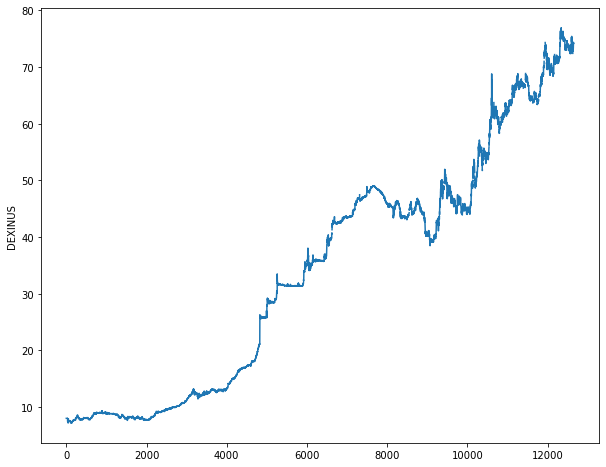

In [45]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df['DEXINUS'])

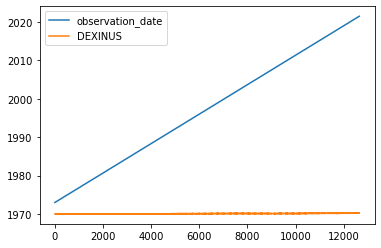

In [46]:
df.plot()
plt.show()

array([[<AxesSubplot:title={'center':'DEXINUS'}>]], dtype=object)

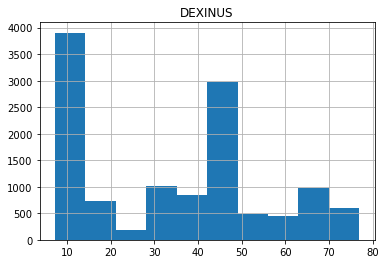

In [47]:
df.hist()

In [49]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
fig = px.bar(df, x='date', y='rate')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'] but received: date

In [50]:
!pip install ploty

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [51]:
!pip install plotly

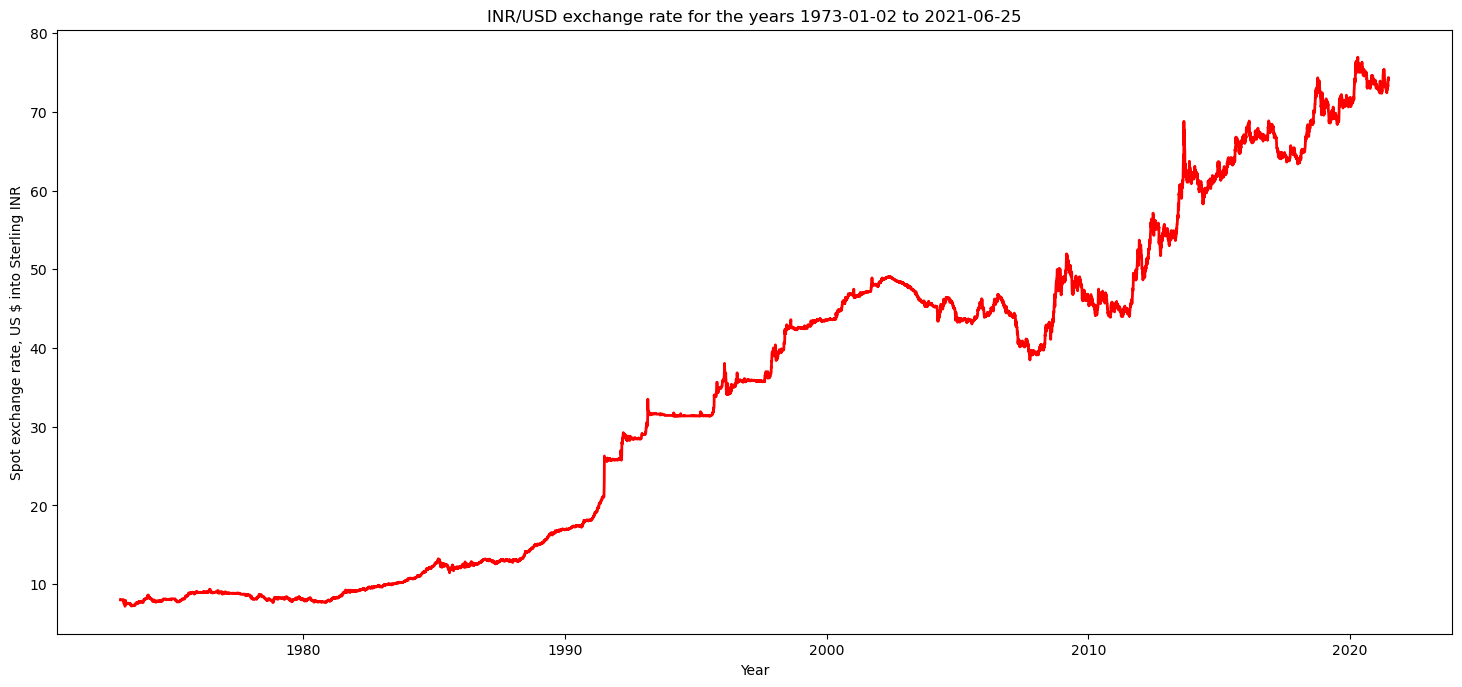

In [52]:
plt.figure(figsize =(18,8),dpi=100)
sns.lineplot(data=data,x=data.date, y=data.rate,color='red', linewidth = 2)
plt.ylabel('Spot exchange rate, US \$ into Sterling INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.date, y=data.rate, marker_color='red'))

fig.update_layout(title='Time Series Plot - India to US exchange rate for the years 1973-01-02 to 2021-06-25', 
                  height=450, width=1000, template='plotly_dark', font_color='lightgreen', 
                  font=dict(family="sans serif",
                            size=16,
                            color="white"
                            ))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Rate / $')
fig.show()

KeyError: 'date and rate'

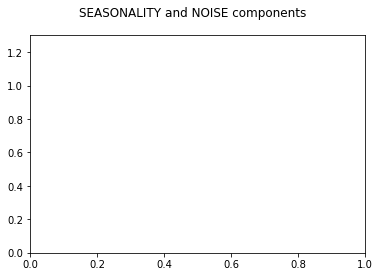

In [64]:
fig = plt.figure()
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0, 1.3)
df['date and rate'].plot()
plt.show()